#                                            WikiScraper 

In [ ]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [165]:
class Scraper:
    
    def __init__(self, subject):
        self.subject = subject
        self.links = self.get_five_links()
        self.currentLinks = self.links
        self.edges = self.gen_edges()
        self.counts = self.gen_node_counts()
        
    def scrape(self):
        links = []
        url = 'https://en.wikipedia.org/wiki/{}'.format(self.subject)
        page = requests.get(url)
        soup = BeautifulSoup(page.text, 'html.parser')
        attrs = {'class':'mw-content-ltr'}
        for div in soup.find_all('div', attrs):
            for p in div.find_all('p'):
                for a in p.find_all('a', href=True):
                    if a['href'][:6] == '/wiki/':
                        links += [a['href'][6:]]
        return links

    def get_five_links(self):
        first_five = []
        links = self.scrape()
        for link in links:
            if not (link.endswith('.svg')) and not (link.startswith('Help:')):
                first_five += [link]
                if len(first_five) == 5:
                    return first_five
        return first_five
    
    def update_links(self):
        subs = []
        for link in self.links:
            temp = Scraper(link)
            subs += temp.get_five_links()
        self.links += subs
        self.currentLinks = subs
        
    def gen_edges(self):
        edges = []
        for link in self.links:
            edges += [(self.subject, link)]
        return edges
    
    def gen_child_edges(self, link):
        edges = [(self.subject, self.subject)]
        temp = Scraper(link)
        for link in temp.links:
            self.edges += [(temp.subject, link)]

    def gen_all_edges(self, depth):
        for i in range(0, depth):
            for link in self.links:
                self.gen_child_edges(link)
            self.update_links()
            
    def gen_node_counts(self):
        counts = {self.subject: 1}
        for edge in self.edges:
            if edge[1] not in counts:
                counts[edge[1]] = 1
            else:
                counts[edge[1]] += 1
        return sorted(counts.items(), key=itemgetter(1), reverse=True)
    

In [166]:
scientology = Scraper('Scientology')
scientology.gen_all_edges(2)
scientology.edges

[('Scientology', u'Scientology_beliefs_and_practices'),
 ('Scientology', u'L._Ron_Hubbard'),
 ('Scientology', u'Dianetics'),
 ('Scientology', u'Dianetics:_The_Modern_Science_of_Mental_Health'),
 ('Scientology', u'E-meter'),
 (u'Scientology_beliefs_and_practices', u'Church_of_Scientology'),
 (u'Scientology_beliefs_and_practices', u'Immortality'),
 (u'Scientology_beliefs_and_practices', u'Spirit'),
 (u'Scientology_beliefs_and_practices', u'Thetan'),
 (u'Scientology_beliefs_and_practices', u'Past_lives#Scientology'),
 (u'L._Ron_Hubbard', u'Science_fiction'),
 (u'L._Ron_Hubbard', u'Fantasy'),
 (u'L._Ron_Hubbard', u'Church_of_Scientology'),
 (u'L._Ron_Hubbard', u'Dianetics:_The_Modern_Science_of_Mental_Health'),
 (u'L._Ron_Hubbard', u'Dianetics'),
 (u'Dianetics', u'Greek_language'),
 (u'Dianetics', u'Mind'),
 (u'Dianetics', u'Metaphysics'),
 (u'Dianetics', u'L._Ron_Hubbard'),
 (u'Dianetics', u'Scientology'),
 (u'Dianetics:_The_Modern_Science_of_Mental_Health', u'L._Ron_Hubbard'),
 (u'Dianet

In [167]:
scientology.gen_node_counts()


[('Scientology', 12),
 (u'Dianetics', 12),
 (u'L._Ron_Hubbard', 10),
 (u'Church_of_Scientology', 9),
 (u'Dianetics:_The_Modern_Science_of_Mental_Health', 7),
 (u'Mind', 5),
 (u'Greek_language', 5),
 (u'E-meter', 4),
 (u'Science_fiction', 4),
 (u'Sigmund_Freud', 4),
 (u'Fantasy', 4),
 (u'Psychoanalysis', 4),
 (u'Metaphysics', 4),
 (u'Canon_law', 3),
 (u'Scientology_controversies', 3),
 (u'Scientology_as_a_business', 3),
 (u'Cult', 3),
 (u'Spirit', 3),
 (u'New_religious_movement', 3),
 (u'Scientology_beliefs_and_practices', 3),
 (u'Electrodermal_activity', 2),
 (u'Auditing_(Scientology)', 2),
 (u'Religion', 2),
 (u'Speculative_fiction', 2),
 (u'Life', 2),
 (u'Philosophy', 2),
 (u'Past_lives#Scientology', 2),
 (u'Thetan', 2),
 (u'Human_studies', 2),
 (u'Genre', 2),
 (u'Immortality', 2),
 (u'Psychopathology', 1),
 (u'Modern_Greek', 1),
 (u'Catholic_Church', 1),
 (u'Death', 1),
 (u'Josef_Breuer', 1),
 (u'Ecclesiastical_jurisdiction', 1),
 (u'Fictional_universe', 1),
 (u'Self', 1),
 (u'Ideas

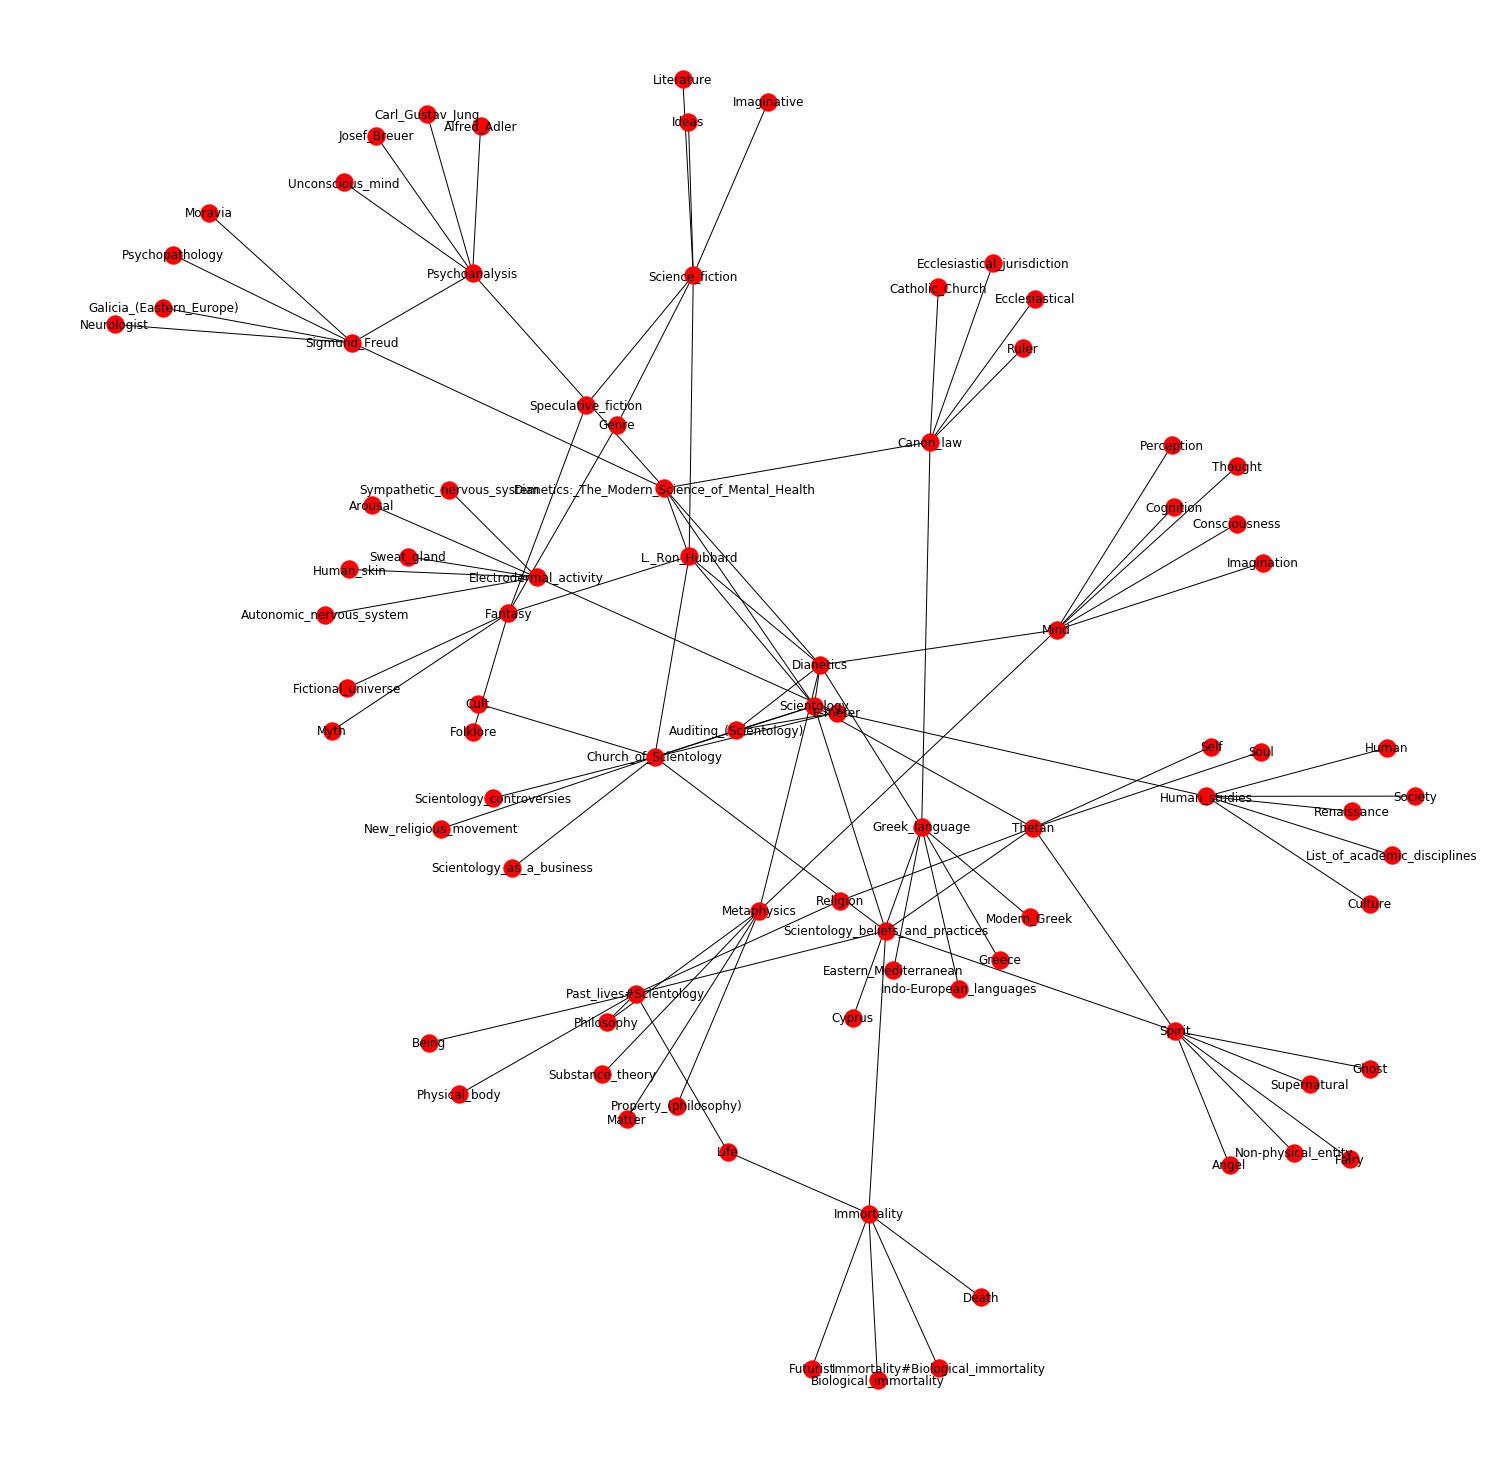

In [168]:
g = nx.Graph(scientology.edges)

pos = nx.spring_layout(g, k=0.3*1/np.sqrt(len(g.nodes())), iterations=20)
plt.figure(3, figsize=(20, 20))
nx.draw(g, pos=pos)
nx.draw_networkx_labels(g, pos=pos)
plt.savefig('scientology.jpg')
plt.show()